In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx to Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx


In [3]:
file_name = next(iter(uploaded))
file_name

'Survey_Perfil_Todos_Usuario_e_Desenvolvedor.xlsx'

In [4]:
%matplotlib inline

import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from functools import reduce
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statistics as s

df = pd.read_excel(file_name)

df

,PERFIL,TEMPO_USO,FREQUENCIA_USO,IDADE,GENERO,FORMACAO,ANOS_EXPERIENCIA,UTILIZACAO_D01F01,UTILIZACAO_D01F02,UTILIZACAO_D01F03,...,QUALIDADE_D02F07,QUALIDADE_D02F08,NAO_ADOCAO_D03F01,NAO_ADOCAO_D03F02,NAO_ADOCAO_D03F03,NAO_ADOCAO_D03F04,NAO_ADOCAO_D03F05,NAO_ADOCAO_D03F06,NAO_ADOCAO_D03F07,NAO_ADOCAO_D03F08
0,1.0,3.0,3.0,2.0,1.0,4.0,3.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,1.0,4.0,4.0,1.0,2.0,4.0,2.0,4.0,2.0,3.0,...,2.0,2.0,4.0,5.0,2.0,4.0,2.0,3.0,4.0,3.0
2,1.0,3.0,4.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,...,5.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,5.0,4.0
3,1.0,2.0,3.0,3.0,1.0,4.0,2.0,4.0,3.0,4.0,...,4.0,4.0,5.0,4.0,5.0,5.0,3.0,3.0,5.0,3.0
4,1.0,1.0,5.0,3.0,1.0,4.0,2.0,5.0,3.0,5.0,...,4.0,5.0,5.0,5.0,3.0,4.0,2.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0,3.0,4.0,...,4.0,4.0,5.0,5.0,4.0,4.0,3.0,0.0,4.0,4.0
169,2.0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,3.0,5.0,...,2.0,4.0,5.0,5.0,4.0,4.0,2.0,3.0,2.0,4.0
170,2.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,4.0,...,4.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,4.0,4.0
171,2.0,4.0,3.0,2.0,2.0,5.0,3.0,4.0,4.0,5.0,...,4.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,5.0,5.0


In [18]:
# Selecting columns
df1 = df.loc[:, lambda df:['TEMPO_USO', 'ANOS_EXPERIENCIA']]
df1.columns = ['Time of Use', 'Years of Experience']
df1

,Time of Use,Years of Experience
0,3.00,3.00
1,4.00,2.00
2,3.00,2.00
3,2.00,2.00
4,1.00,2.00
...,...,...
168,4.00,3.00
169,2.00,2.00
170,1.00,2.00
171,4.00,3.00


In [24]:
df3_grafico = pd.DataFrame({'Less than 1 year ago':[len(df1[(df1['Years of Experience'] == 1.0) & (df1['Time of Use'] == 1.0)]) ,len(df1[(df1['Years of Experience'] == 2.0) & (df1['Time of Use'] == 1.0)]), len(df1[(df1['Years of Experience'] == 3.0) & (df1['Time of Use'] == 1.0)]) , len(df1[(df1['Years of Experience'] == 4.0) & (df1['Time of Use'] == 1.0)]) , len(df1[(df1['Years of Experience'] == 5.0) & (df1['Time of Use'] == 1.0)]) , len(df1[(df1['Years of Experience'] == 6.0) & (df1['Time of Use'] == 1.0)])],
                            'Between 1 and 2 years':[len(df1[(df1['Years of Experience'] == 1.0) & (df1['Time of Use'] == 2.0)]) ,len(df1[(df1['Years of Experience'] == 2.0) & (df1['Time of Use'] == 2.0)]), len(df1[(df1['Years of Experience'] == 3.0) & (df1['Time of Use'] == 2.0)]) , len(df1[(df1['Years of Experience'] == 4.0) & (df1['Time of Use'] == 2.0)]) , len(df1[(df1['Years of Experience'] == 5.0) & (df1['Time of Use'] == 2.0)]) , len(df1[(df1['Years of Experience'] == 6.0) & (df1['Time of Use'] == 2.0)])],
                            'Between 3 and 5 years':[len(df1[(df1['Years of Experience'] == 1.0) & (df1['Time of Use'] == 3.0)]) ,len(df1[(df1['Years of Experience'] == 2.0) & (df1['Time of Use'] == 3.0)]), len(df1[(df1['Years of Experience'] == 3.0) & (df1['Time of Use'] == 3.0)]) , len(df1[(df1['Years of Experience'] == 4.0) & (df1['Time of Use'] == 3.0)]) , len(df1[(df1['Years of Experience'] == 5.0) & (df1['Time of Use'] == 3.0)]) , len(df1[(df1['Years of Experience'] == 6.0) & (df1['Time of Use'] == 3.0)])],
                            'More than 6 years ago':[len(df1[(df1['Years of Experience'] == 1.0) & (df1['Time of Use'] == 4.0)]) ,len(df1[(df1['Years of Experience'] == 2.0) & (df1['Time of Use'] == 4.0)]), len(df1[(df1['Years of Experience'] == 3.0) & (df1['Time of Use'] == 4.0)]) , len(df1[(df1['Years of Experience'] == 4.0) & (df1['Time of Use'] == 4.0)]) , len(df1[(df1['Years of Experience'] == 5.0) & (df1['Time of Use'] == 4.0)]) , len(df1[(df1['Years of Experience'] == 6.0) & (df1['Time of Use'] == 4.0)])],
                                 })
# Create the index
#index_ = ['High school', 'University graduate', 'Specialization', 'Master\'s degree', 'Doctorate degree', 'Post doctoral']

index_ = ['Less than 1 year', 'Between 1 and 5 years', 'Between 6 and 10 years', 'Between 11 and 15 years', 'Between 16 and 20 years','More than 20 years']
df3_grafico.index = index_

df3_grafico

,Less than 1 year ago,Between 1 and 2 years,Between 3 and 5 years,More than 6 years ago
Less than 1 year,4,3,0,0
Between 1 and 5 years,6,16,39,5
Between 6 and 10 years,2,4,18,30
Between 11 and 15 years,1,0,6,10
Between 16 and 20 years,1,1,0,9
More than 20 years,0,0,2,16


In [26]:

# Create the index
index_ = ['Less than 1 year', 'Between 1 and 5 years', 'Between 6 and 10 years', 'Between 11 and 15 years', 'Between 16 and 20 years','More than 20 years']
df3_grafico.index = index_

#pd.options.display.float_format = '{:.2f}'.format

df3_grafico

center_aligned_df = df3_grafico.style.set_properties(**{'text-align': 'center'})
 
center_aligned_df = center_aligned_df.set_table_styles(
[dict(selector = 'th', props=[('text-align', 'center')])])

pd.options.display.float_format = '{:.2f}'.format

center_aligned_df


df3_grafico




,Less than 1 year ago,Between 1 and 2 years,Between 3 and 5 years,More than 6 years ago
Less than 1 year,4,3,0,0
Between 1 and 5 years,6,16,39,5
Between 6 and 10 years,2,4,18,30
Between 11 and 15 years,1,0,6,10
Between 16 and 20 years,1,1,0,9
More than 20 years,0,0,2,16


In [27]:
df7 = df3_grafico.transpose()

df7

,Less than 1 year,Between 1 and 5 years,Between 6 and 10 years,Between 11 and 15 years,Between 16 and 20 years,More than 20 years
Less than 1 year ago,4,6,2,1,1,0
Between 1 and 2 years,3,16,4,0,1,0
Between 3 and 5 years,0,39,18,6,0,2
More than 6 years ago,0,5,30,10,9,16


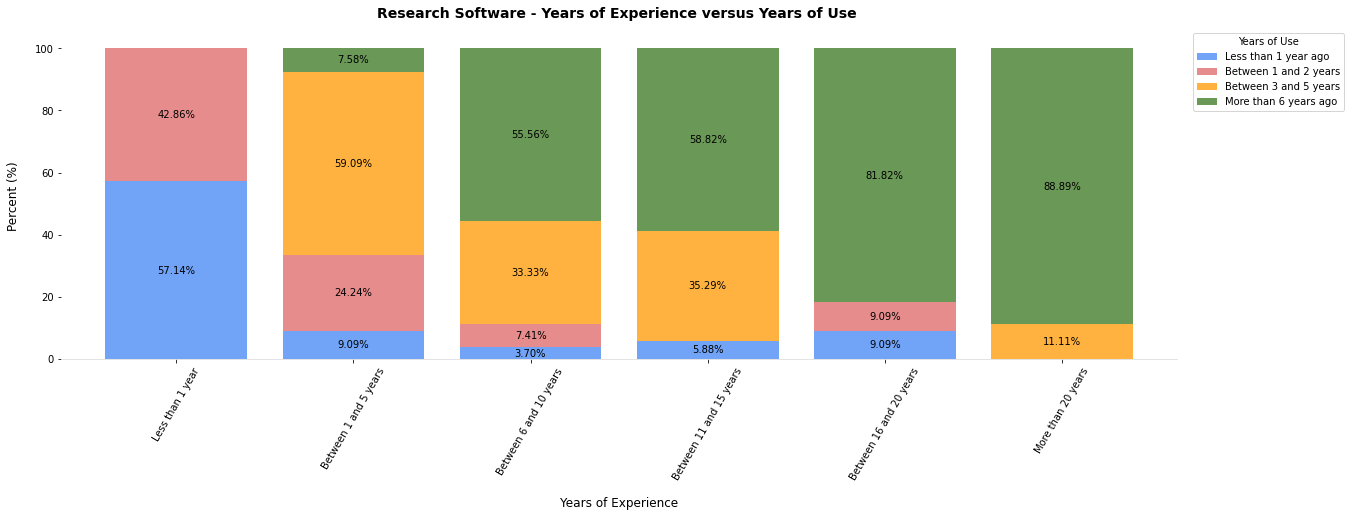

In [28]:
from pandas.io.common import is_fsspec_url
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

plotdata = df7
plotdata.head()

colours = {"Less than 1 year ago": "#4285F4", "Between 1 and 2 years": "#E06666", "Between 3 and 5 years": "#FF9900", "More than 6 years ago": "#38761D"}

plt.rcParams["figure.figsize"] = (20, 6)

my_list = list(df3_grafico)
length = len(my_list)
val =list()
a = list()
temp = []

for i in range(length):
   #print(my_list[i])
   #val = plotdata[my_list[i]].values
   val = list(df3_grafico[my_list[i]].values)

   for n in range(6):
     a = ((val[n])) 
#     if a > 0:
#    print (a)
     temp.append(a) 
#print (temp)

ax = plotdata.apply(lambda y: y*100/sum(y), axis=0).transpose().plot(kind="bar", stacked=True, color=colours, width=0.8, alpha=0.75, rot=60)

ax.legend(loc='upper right', ncol=1, title="Years of Use", borderaxespad=0, bbox_to_anchor=(1.15, 1))


#ax = plotdata.apply(lambda x: x*100/sum(x), axis=1)
#apply(lambda y: y*100/sum(y), axis=0)

#ax.set_ylim(0, 100)
#ticks = ax.set_yticks([0, 25, 50, 75, 100])
#ax.set_yticklabels(("0%", "25%", "50%", "75%", "100%")) 
#ax.tick_params(bottom=False, left=False)


## Width of bars (everything above 1 will overlap)
FigBarsWidth=0.8
## FontSize of bar lables
FigBarsFontSize=10
# Data and Captions (needs to be defined)
## Unit to display within bars
FigBarUnit="%"

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # The width of the bar is the data value and can be used as the label
    label_text = ""
    # plot only when width is greater than specified value
    if height > 0:
            
      label_text = f'{height:.2f}' + FigBarUnit  ##### use {width:.2f} or {width:.3f} to increase precision  ####
      #label_text = label_text + " (" + str(int(height*(y)/100)) + ")" 
      #label_text = label_text + " (" + str(int(0)) + ")" 
      # plot only when height is greater than specified value 
      ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=FigBarsFontSize)
   

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# add labels
ax.set_title("Research Software - Years of Experience versus Years of Use ", pad=15, fontsize=14, weight='bold')
ax.set_ylabel("Percent (%)", labelpad=15, fontsize=12)
ax.set_xlabel("Years of Experience", labelpad=15, fontsize=12)

plt.show()

